In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [14]:
train_df = pd.read_excel("data/train.xlsx")
test1_df = pd.read_excel("data/testA.xlsx")
test2_df = pd.read_excel("data/testB.xlsx")

In [15]:
train_y = train_df[train_df.columns[-1]]
train_y.shape

(800,)

In [16]:
new_column = test1_df.columns
train_df = train_df[new_column]
train_id = train_df['ID']
test1_id = test1_df['ID']
test2_id = test2_df['ID']
train_df.drop(['ID'], axis=1, inplace=True)
test1_df.drop(['ID'], axis=1, inplace=True)
test2_df.drop(['ID'], axis=1, inplace=True)

In [17]:
# ints or strings
ints = []
year = []
for i in range(len(names)):
    if 'int' in str(dts[i]) or 'object' in str(dts[i]):
        ints.append(names[i])
print(len(ints))

for n in ints:
    if str(train_df[n][0])[:4] == '2017' and str(test1_df[n][0])[:4] == '2017':
        year.append(n)
print(len(year))

770
45


In [ ]:
names = train_df.columns
dts = train_df.dtypes
drop_names = []
year = []
ratio = 0.1
for i in range(len(names)):
    n = names[i]
    tp = dts[i]
    trd = train_df[n]
    ted = test1_df[n]
    if 'object' == str(tp):
        continue
    else:
        misstr = np.sum(trd.isnull())/500
        misste = np.sum(ted.isnull())/100
        if np.abs(misstr-misste) > ratio:
            drop_names.append(n)
        else:
            if 'int' in str(tp):
                if str(train_df[n][0])[:4] == '2017' and str(train_df[n][499])[:4] == '2017':
                    year.append(n)
            else:
                trrd = trd[trd.notnull()]
                terd = ted[ted.notnull()]
                m1 = np.mean(trrd)
                s1 = np.std(trrd)
                m2 = np.mean(terd)
                s2 = np.std(terd)
                if np.abs(m1-m2)>ratio*np.abs(m1) and np.abs(s1-s2)>ratio*np.abs(s1):
                    drop_names.append(n)
print(len(drop_names))
print(len(year))

In [13]:
train_df.drop(drop_names, axis=1, inplace=True)
test1_df.drop(drop_names, axis=1, inplace=True)
test2_df.drop(drop_names, axis=1, inplace=True)

In [7]:
names = train_df.columns
dfs = train_df.dtypes

In [8]:
# ints or strings
ints = []
for i in range(len(names)):
    if 'int' in str(dfs[i]) or 'object' in str(dfs[i]):
        ints.append(names[i])
print(len(ints))

592


In [9]:
df_X = pd.concat([train_df, test1_df, test2_df], axis=0)

In [10]:
dfx_year = df_X[year]

In [11]:
remains1 = []
remains2 = []
tobedrop = []

for n in ints:
    lu1 = len(train_df[n].unique())
    lu2 = len(df_X[n].unique())
    if lu1 < 10 and lu1 > 1:
        remains1.append(n)
    if lu2 < 10 and lu2 > 1:
        remains2.append(n)
    if lu1 != lu2:
        tobedrop.append(n)
    
print(len(remains1), len(remains2), len(tobedrop), len(year))

135 169 229 40


In [12]:
toberemain = list(set(remains1) & set(remains2) - set(tobedrop))
print(len(toberemain))

87


In [13]:
def dict2list(dic:dict):
    ''' 将字典转化为列表 '''
    keys = dic.keys()
    vals = dic.values()
    lst = [(key, val) for key, val in zip(keys, vals)]
    return lst

def LastRemainJudge(column):
    unique = set(column)
    uf = {}
    for u in unique:
        uf[u] = 0
    for c in column:
        uf[c] += 1
    sl = sorted(dict2list(uf), key = lambda x:x[1], reverse=True)
    x = sl[0][1]/len(column)
    sl = np.array(sl)
    if x < 0.8:
        #print(sl[:, 1]/len(column))
        return True
    else:
        return False

In [14]:
lm1 = []
lm2 = []
for n in toberemain:
    if LastRemainJudge(train_df[n]):
        lm1.append(n)
    if LastRemainJudge(df_X[n]):
        lm2.append(n)
print(len(lm1), len(lm2), len(set(lm1)&set(lm2)))

53 52 52


In [15]:
names = df_X.columns
dts = df_X.dtypes
dfx_float_n = []
dfx_onehot_n = list(set(lm1) & set(lm2))
print(len(dfx_onehot_n))
for i in range(len(names)):
    n = names[i]
    d = dts[i]
    if 'float' in str(d):
        dfx_float_n.append(n)
print(len(dfx_float_n))
dfx_float = df_X[dfx_float_n]
dfx_onehot = df_X[dfx_onehot_n]
print(dfx_float.shape, dfx_onehot.shape)

52
3097
(1512, 3097) (1512, 52)


In [16]:
drop_names = []
names = dfx_float.columns
for n in names:
    x = np.sum(dfx_float[n].isnull())
    if x > 500:
        drop_names.append(n)
print(len(drop_names))

0


In [19]:
means = []
stds = []
drop_names = []
names = dfx_float.columns
for n in names:
    c = dfx_float[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    means.append(tmpm)
    stds.append(tmps)
    if tmps == 0:
        drop_names.append(n)
print(len(set(means)), len(set(stds)))
print(len(drop_names))

1292 1278
0


In [18]:
dfx_float.drop(drop_names, axis=1, inplace=True)

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# not move sames first, fill nan
added = set()
sames = []
for i in range(len(names)):
    tmpsl = []
    tmpsl.append(i)
    for j in range(i+1, len(names)):
        if means[i] == means[j] and stds[i] == stds[j]:
            if i not in added:
                added.add(i)
            if j not in added:
                added.add(j)
                tmpsl.append(j)
    if len(tmpsl) > 1:
        sames.append(tmpsl)
print(len(sames))

358


In [21]:
names = dfx_float.columns
drop_names = []
for i in sames:
    for j in i[1:]:
        drop_names.append(names[j])
print(len(drop_names))

1672


In [22]:
print(dfx_float.shape)

(1512, 2966)


In [23]:
import copy
trainx_float = copy.copy(dfx_float)
trainx_float.drop(drop_names, axis=1, inplace=True)
print(trainx_float.shape)

(1512, 1294)


In [24]:
names = trainx_float.columns
for n in names:
    c = trainx_float[n]
    r = c[c.notnull()]
    tmpm = np.mean(r)
    tmps = np.std(r)
    assert tmps>0
    trainx_float[n][c.isnull()] = tmpm
print(np.sum(trainx_float.isnull().values))

0


In [25]:
# it shall be that there is only thre lines with nan in log1p
mid = trainx_float-np.min(trainx_float)+1
trainx_log1p = np.log1p(mid)
del mid
print(np.sum(trainx_log1p.isnull().values))

0


In [26]:
for n in names:
    m1 = np.mean(trainx_float[n])
    s1 = np.std(trainx_float[n])
    assert s1 > 0
    trainx_float[n] = (trainx_float[n]-m1)/s1
    m2 = np.mean(trainx_log1p[n])
    s2 = np.std(trainx_log1p[n])
    assert s2 > 0
    trainx_log1p[n] = (trainx_log1p[n]-m2)/s2

In [27]:
# make onehots onehot
ohnames = dfx_onehot.columns
for i in range(len(ohnames)):
    n = ohnames[i]
    tmp = pd.get_dummies(dfx_onehot[n], prefix='onehot_'+str(i))
    dfx_onehot = pd.concat([dfx_onehot, tmp], axis=1)
    #print(dfx_onehot.shape)

In [28]:
dfx_onehot.drop(ohnames, axis=1, inplace=True)
print(dfx_onehot.shape)

(1512, 200)


In [29]:
dfx_float = trainx_float
dfx_log1p = trainx_log1p

In [30]:
year_n = dfx_year.columns
standardlen = len(str(dfx_year[year_n[0]][0]))
for i in range(1, len(year_n)):
    l = len(str(dfx_year[year_n[i]][0]))
    bias = standardlen - l
    b10 = 1
    if bias > 0:
        for j in range(bias):
            b10 *= 10
            #dfx_year[year_n[i]] /= 10
    elif bias < 0:
        for j in range(-bias):
            b10 /= 10
            #dfx_year[year_n[i]] *= 10
    if b10 != 1:
        dfx_year[year_n[i]] *= b10
    dfx_year[year_n[i]] = dfx_year[year_n[i]] - dfx_year[year_n[0]] 

/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/magnusterra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [76]:
dfx_time = (dfx_year - np.mean(dfx_year))/np.std(dfx_year)

In [85]:
dfx_time.shape

(1512, 40)

In [86]:
dfx_time = dfx_time[dfx_time.columns[1:]]

In [87]:
dfx_time.shape

(1512, 39)

In [35]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


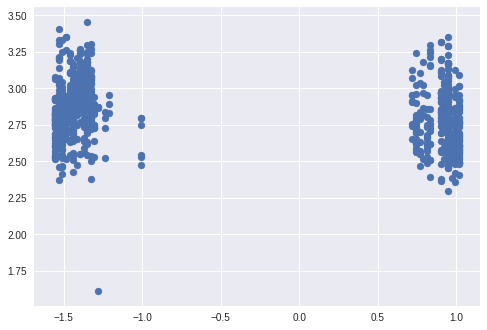

In [52]:
plt.scatter(dfx_time.values[:800, 20], train_y.values)
plt.show()

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [94]:
def MSE(y_raw, y_pred):
    r = np.mean(np.square(y_raw-y_pred))
    #print(r)
    return r

In [55]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV 

/home/magnusterra/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [113]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=2018)
def get_oof(rgr, xtrain, ytrain, xtest, lenot, lenoe):
    oof_train = np.zeros((lenot,))
    oof_test = np.zeros((lenoe,))
    oof_test_skf = np.empty((5, lenoe))
    for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
        kf_xtrain = xtrain[train_index]
        kf_ytrain = ytrain[train_index]
        kf_xtest = xtrain[test_index]
        rgr.fit(kf_xtrain, kf_ytrain)
        oof_train[test_index] = rgr.predict(kf_xtest)
        oof_test_skf[i, : ] = rgr.predict(xtest)
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)

In [88]:
dfx = pd.concat([dfx_log1p, dfx_onehot], axis=1)
dfx.shape

(1512, 1494)

In [89]:
ndfx = pd.concat([dfx, dfx_time], axis=1)
ndfx.shape

(1512, 1533)

In [90]:
trndfx = ndfx[:800]
trndfx = trndfx[train_y>1.8]

In [91]:
trny = train_y[train_y>1.8]
trny.shape

(799,)

In [92]:
results = []
for i in range(100):
    subxtrain, subxval, subytrain, subyval = train_test_split(trndfx.values, trny.values, test_size=0.2, random_state=i)
    
    xgb = XGBRegressor()
    xgb.fit(subxtrain, subytrain)
    test1_pred = xgb.predict(subxval)
    t = MSE(test1_pred, subyval)
    results.append(t)
print(np.mean(results), np.std(results), np.max(results), np.min(results))

0.012956001176
0.0150168025429
0.015843769448
0.0131705455574
0.0156547362543
0.0146185219075
0.0158633236506
0.0167757342976
0.0135966512199
0.0145114011405
0.0172754119816
0.0171190575495
0.0105734644657
0.0124101902374
0.0126557356753
0.015217866917
0.0167976511115
0.0146798482578
0.0141277893793
0.0172738964178
0.0127518392458
0.013905636772
0.0145157559799
0.0154943764592
0.0174574300301
0.0164373301091
0.013905253713
0.0148862882576
0.0139915444035
0.0125284288349
0.0139929158424
0.0139163575899
0.0146356923942
0.0156436487755
0.0150150257671
0.0162272868305
0.0142023871309
0.0134772090564
0.0189895926045
0.0177293716459
0.0127569953264
0.018876079102
0.0154266007152
0.0147759270755
0.0136348156065
0.0122414702742
0.0165051503477
0.0157881905492
0.0163351629827
0.015429703898
0.0144718424726
0.0144499678893
0.0146097353736
0.0147579720675
0.0158972966404
0.0144523196403
0.0143572425903
0.0156763162759
0.0145365142343
0.013556625133
0.0178730312302
0.0141170712657
0.0121557544992


In [93]:
results = []
for i in range(100):
    subxtrain, subxval, subytrain, subyval = train_test_split(ndfx[:800].values, train_y.values, test_size=0.2, random_state=i)

    xgb = XGBRegressor()
    xgb.fit(subxtrain, subytrain)
    test1_pred = xgb.predict(subxval)
    t = MSE(test1_pred, subyval)
    results.append(t)
print(np.mean(results), np.std(results), np.max(results), np.min(results))

0.0135574214126
0.0164872261235
0.0162525870101
0.0214337744511
0.0253874904891
0.0163909634633
0.0169658296069
0.0154989624207
0.0142551938484
0.0140980651021
0.0131023609852
0.017116023615
0.0110168668444
0.0141042236556
0.0132669091062
0.0150043251495
0.0251771290681
0.0129299274312
0.0122980973252
0.0247279711981
0.0113913543423
0.0245754927174
0.0148365673404
0.0155191793253
0.0152708444741
0.0163950287949
0.0226646010458
0.0132511928378
0.0227390401291
0.013033943196
0.0135286906774
0.0208047247143
0.0125110271558
0.0238323786803
0.0158291090335
0.0159678129237
0.0240316998322
0.0210864260986
0.01725108176
0.0146208094491
0.0140139392389
0.0160940329359
0.015002615111
0.0151080626849
0.0145854730014
0.0110666709734
0.0164601056893
0.0243838124178
0.0150882340591
0.0129399163975
0.01491601412
0.0234373903215
0.014000310685
0.0140418323898
0.0214111215984
0.0239153520837
0.0147230896859
0.0175141975434
0.017402327481
0.0135053632946
0.0157099977967
0.014759646247
0.0142877182763
0.

In [84]:
# drop one low point and first time 0.014741465827 0.00162512429795 0.0189895926045 0.0105734644657
# drop first time                   0.0167161948738 0.00383721889742 0.0253874904891 0.0110168668444
# drop one low point                0.014741465827 0.00162512429795 0.0189895926045 0.0105734644657
# no drop                           0.0167161948738 0.00383721889742 0.0253874904891 0.0110168668444 

In [98]:
tuned_parameters = {'objective':['reg:linear', 'reg:gamma'], 'max_depth':[1,2,3,4],
                    'gamma':[0, 1e-3, 1e-2,  1e-4], 'subsample':[0.85, 0.7],
                   'colsample_bytree':[0.5, 0.75, 1], 'reg_lambda':[1,2]}
scores = ['MSE']
for i in range(100):
    subxtrain, subxval, subytrain, subyval = train_test_split(trndfx.values, trny.values, test_size=0.2, random_state=i)
    
    clf = GridSearchCV(estimator =XGBRegressor(), param_grid =tuned_parameters, cv=5, scoring='neg_mean_squared_error')
    clf.fit(subxtrain, subytrain)
    print(i)
    print(clf.best_params_)  
    y_pred1 = clf.predict(subxtrain)
    mse1 = MSE(y_pred1, subytrain)
    y_pred2 = clf.predict(subxval)
    mse2 = MSE(subyval, y_pred2)
    print(mse1, mse2)
print("----------------------------------")
clf = GridSearchCV(estimator =XGBRegressor(), param_grid =tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(trndfx.value, trny.values)
print(clf.best_params_)  
y_pred1 = clf.predict(trndfx.value)
print(MSE(y_pred1, trny.values))

0
{'colsample_bytree': 0.75, 'gamma': 0.001, 'max_depth': 4, 'objective': 'reg:gamma', 'reg_lambda': 1, 'subsample': 0.85}
0.00146086023566 0.0128567520904
1
{'colsample_bytree': 0.5, 'gamma': 0.001, 'max_depth': 3, 'objective': 'reg:linear', 'reg_lambda': 1, 'subsample': 0.85}
0.00282183987351 0.0141974493677
2
{'colsample_bytree': 0.75, 'gamma': 0.001, 'max_depth': 4, 'objective': 'reg:linear', 'reg_lambda': 1, 'subsample': 0.85}
0.000817409294922 0.0143166110715
3
{'colsample_bytree': 0.75, 'gamma': 0.001, 'max_depth': 4, 'objective': 'reg:linear', 'reg_lambda': 1, 'subsample': 0.85}
0.000940050607208 0.0129356805313
4
{'colsample_bytree': 0.75, 'gamma': 0.0001, 'max_depth': 4, 'objective': 'reg:gamma', 'reg_lambda': 1, 'subsample': 0.7}
0.00142270923584 0.0160145394252
5
{'colsample_bytree': 0.5, 'gamma': 0.0001, 'max_depth': 4, 'objective': 'reg:gamma', 'reg_lambda': 1, 'subsample': 0.85}
0.00142029589041 0.0142416098444
6
{'colsample_bytree': 1, 'gamma': 0.0001, 'max_depth': 3, '

KeyboardInterrupt: 

In [110]:
results = []
for i in range(100):
    subxtrain, subxval, subytrain, subyval = train_test_split(trndfx.values, trny.values, test_size=0.2, random_state=i)
    
    xgb = XGBRegressor(gamma=0.0001, max_depth=4, objective='reg:linear')
    xgb.fit(subxtrain, subytrain)
    test1_pred = xgb.predict(subxval)
    t = MSE(test1_pred, subyval)
    results.append(t)
print(np.mean(results), np.std(results), np.max(results), np.min(results))

0.0143759856513 0.00165673281146 0.0193661159421 0.0104029329989


In [106]:
# drop one low point and first time 0.014741465827 0.00162512429795 0.0189895926045 0.0105734644657
# gamma 0.001 maxdepth 4  reglinear 0.0144610802404 0.00175733689859 0.0196985530573 0.0100834249352
# gamma 0.0001 maxdepth 4 reglinear 0.0143856951298 0.00170540998626 0.0191399670418 0.00971191056159
# colsample_bytree 0.75 subsample 0.85 0.0142421094143 0.00181883817878 0.0197610426883 0.010295341613
# gamma 0.0001 maxdepth 4 reggamma  0.0149096180762 0.00172825596149 0.0199681654468 0.010476040449
# gamma 0.0001 maxdepth 3 reglinear 0.0147272494118 0.00162162861641 0.0189899116751 0.0105731757251

In [119]:
results = []
for i in range(100):
    subxtrain, subxval, subytrain, subyval = train_test_split(trndfx.values, trny.values, test_size=0.2, random_state=i)
    xgb = XGBRegressor()
    tr_pred, tepred = get_oof(xgb, subxtrain, subytrain, subxval, len(subytrain), len(subyval))
    print(MSE(tr_pred, subytrain))
    t = MSE(tepred, subyval)
    results.append(t)
print(np.mean(results), np.std(results), np.max(results), np.min(results))

0.0667875043903
0.0639566714423
0.0662796512958
0.0655412960678
0.0662920383448
0.0655230259902
0.0607955913241
0.0631220491814
0.0637432964298
0.0632103322711
0.0606378348564
0.0610464684039
0.0666560580885
0.0664667043301
0.0642778931019
0.0648257475045
0.061317761155
0.0639878491319
0.0617881318216
0.065396844497
0.0632319641659
0.0658815384733
0.0654728547835
0.0650374444198
0.0638208359601
0.0603828982556
0.0635416629148
0.062053435724
0.0634516671694
0.0646066783626
0.0651099018204
0.0631536667199
0.06539549973
0.0628728664347
0.0648070352683
0.0649789869466
0.0638124927033
0.0684285401821
0.0600031681137
0.063076508852
0.0667324006048
0.0619947071055
0.0647441842258
0.0637976361614
0.0632864589939
0.0638321666021
0.0632500693105
0.0631557793934
0.0620323755622
0.0653453908303
0.0654716446384
0.0653208844355
0.0653168611421
0.0625671968117
0.0656561167129
0.0654098099998
0.0662353952486
0.0620449108842
0.0635409773378
0.0643381742026
0.0615903307172
0.0639980558596
0.062350688974

In [121]:
xgb = XGBRegressor(gamma=0.0001, max_depth=4, objective='reg:linear')
xgb.fit(trndfx.values, trny.values)
test1_pred = xgb.predict(trndfx.values)
print(MSE(test1_pred, trny.values))
test1_pred = xgb.predict(ndfx[800:1100].values)
test1_pred = test1_pred.reshape(300)
save = pd.DataFrame({'ID':test1_id, 'value':test1_pred})
save.to_csv('answer/Synchronous_logohtime_xgb_20180119.csv', index=False, header=False)

0.00135708685441


In [122]:
ndfx.shape

(1512, 1533)

In [1]:
# 0 : GradientBoostingRegressor
# 1 : ExtraTreesRegressor
# 2 : RandomForestRegressor
# 3 : SVM Regressor(RBF Kernel)
# 4 : KNN Regressor(Distance-weighted)
# 5 : Decision TreeRegressor
# 6 : KNN Regressor (Uniform-weighted)
# 7 : LinearRegression
# 8 : SGDRegressor
# 9 : SVM Regressor(Linear Kernel)

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor

def Regressor(number):
    if number == 0:
        return GradientBoostingRegressor()
    elif number == 1:
        return ExtraTreesRegressor()
    elif number == 2:
        return RandomForestRegressor()
    elif number == 3:
        return SVR(kernel='rbf')
    elif number == 4:
        return KNeighborsRegressor(weights='distance')
    elif number == 5:
        return DecisionTreeRegressor()
    elif number == 6:
        return KNeighborsRegressor(weights='uniform')
    elif number == 7:
        return LinearRegression()
    elif number == 8:
        return SGDRegressor()
    elif number == 9:
        return SVR(kernel='linear')
    else:
        return None

In [ ]:
for x in range(10):
    results = []
    for i in range(100):
        subxtrain, subxval, subytrain, subyval = train_test_split(trndfx.values, trny.values, test_size=0.2, random_state=i)
        xgb = Regressor()
        tr_pred, tepred = get_oof(xgb, subxtrain, subytrain, subxval, len(subytrain), len(subyval))
        t = MSE(tepred, subyval)
        results.append(t)
    print(np.mean(results), np.std(results), np.max(results), np.min(results))